## US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años). 

In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
# Load specific forecasting tools
#from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults #, AutoReg
#from pmdarima import auto_arima
%matplotlib inline

In [55]:
# Load the U.S. Population dataset
df = pd.read_csv('./uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS' # frecuencia mensual

In [56]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Gráfico de la serie

[Text(0, 0.5, 'Pop. Est. (thousands)')]

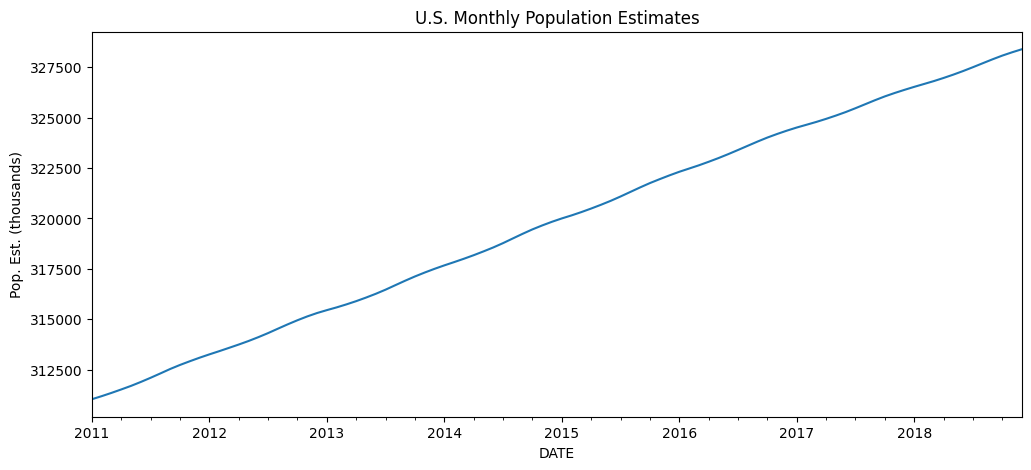

In [57]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'

ax = df['PopEst'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel)

## Datos entrenamiento/prueba


In [58]:
len(df)

96

In [59]:
train = df.iloc[:84]
test = df.iloc[84:]

## Modelo AR(1) 

In [60]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [61]:
""" model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}') """

model = AutoReg(train['PopEst'], lags=1, old_names=False) #modelo auto regresibo de orden uno.
AR1fit = model.fit()

# Accediendo a los lags correctamente

print(f'Coefficients:\n{AR1fit.params}')
print(f'Coefficients:\n{AR1fit.ar_lags}') 

Coefficients:
const        284.913797
PopEst.L1      0.999686
dtype: float64
Coefficients:
[1]


In [62]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [63]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [64]:
# Comparando predicciones con valores reales
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326560.4034, expected=326527
predicted=326742.7495, expected=326669
predicted=326925.0383, expected=326812
predicted=327107.2698, expected=326968
predicted=327289.4442, expected=327134
predicted=327471.5613, expected=327312
predicted=327653.6212, expected=327502
predicted=327835.6239, expected=327698
predicted=328017.5695, expected=327893
predicted=328199.4579, expected=328077
predicted=328381.2892, expected=328241
predicted=328563.0633, expected=328393


<Axes: xlabel='DATE'>

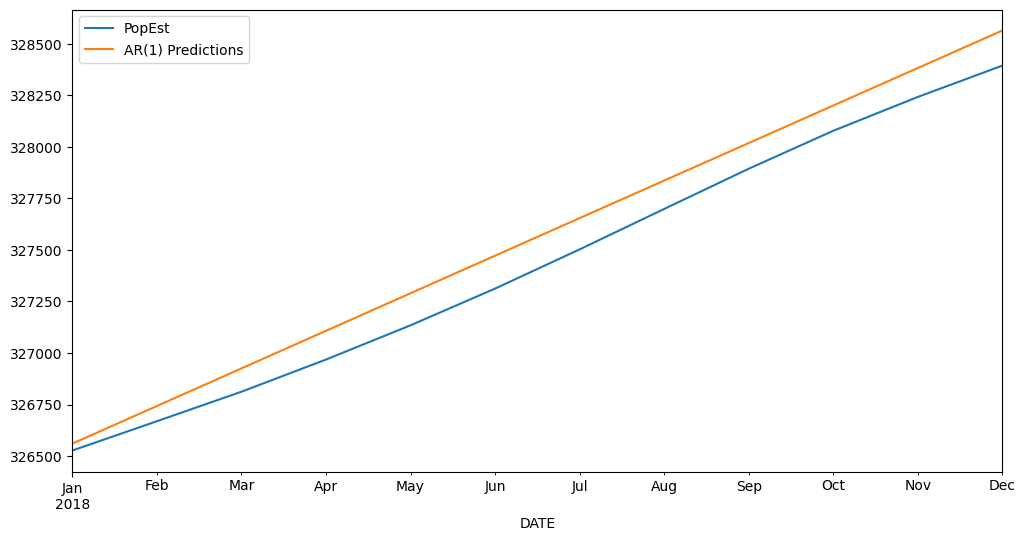

In [65]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

## Modelo AR(2)

In [66]:
# Recall that our model was already created above based on the training set
""" AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}') """
model = AutoReg(train['PopEst'], lags=2, old_names=False) #modelo auto regresibo de orden dos.
AR2fit = model.fit()
# Accediendo a los lags correctamente
print(f'Coefficients:\n{AR1fit.params}')
print(f'Coefficients:\n{AR1fit.ar_lags}') 

Coefficients:
const        284.913797
PopEst.L1      0.999686
dtype: float64
Coefficients:
[1]


In [67]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

<Axes: xlabel='DATE'>

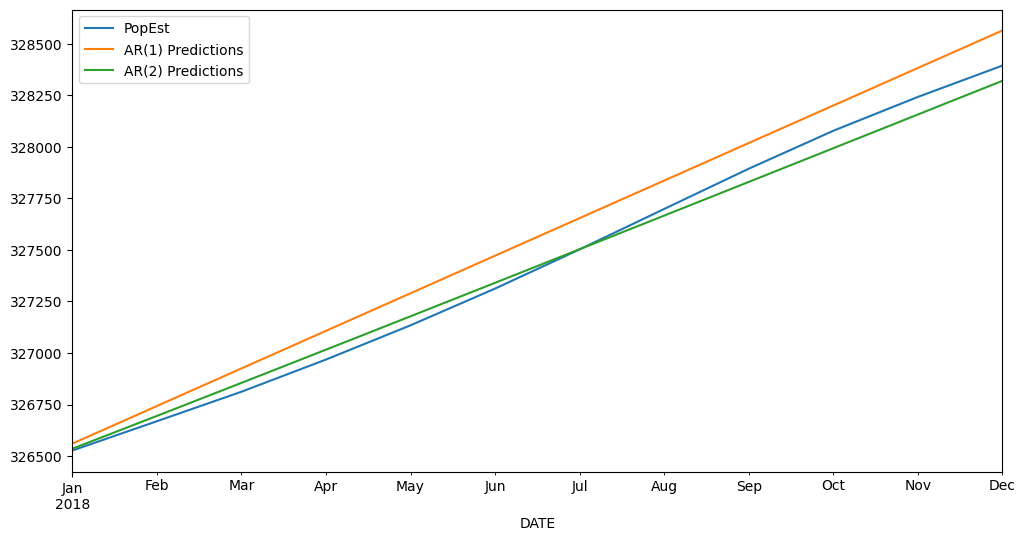

In [17]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6))

## Modelo AR(p) donde statsmodels elige p


In [19]:
#model = AR(train['PopEst'])
#ARfit_bic = model.fit(ic='bic')

""" model = AutoReg(train['PopEst'], old_names=False, hold_back=10)
ARfit_aut_lags = model.fit()
#print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit_aut_lags.params}')
print(f'Coefficients:\n{ARfit_aut_lags.ar_lags}')  """

" model = AutoReg(train['PopEst'], old_names=False, hold_back=10)\nARfit_aut_lags = model.fit()\n#print(f'Lag: {ARfit.k_ar}')\nprint(f'Coefficients:\n{ARfit_aut_lags.params}')\nprint(f'Coefficients:\n{ARfit_aut_lags.ar_lags}')  "

Ociones para probar esto.
```
model = AR(train['PopEst'])
ARfit_bic = model.fit(ic='bic')
```

#Opción uno.

In [20]:
def select_best_autoreg(train, max_lags=20):
    best_bic = np.inf
    best_model = None
    best_lag = 0
    
    for lag in range(1, max_lags + 1):
        try:
            model = AutoReg(train, lags=lag, old_names=False)
            result = model.fit()
            if result.bic < best_bic:
                best_bic = result.bic
                best_model = result
                best_lag = lag
        except Exception as e:
            continue  # Saltar lags que no puedan ajustarse

    print(f"Mejor número de rezagos según BIC: {best_lag}")
    return best_model


#Opción Dos

In [ ]:
def select_best_arima(train, max_p=20):
    best_bic = np.inf
    best_model = None
    best_order = (0, 0, 0)

    for p in range(1, max_p + 1):
        try:
            model = ARIMA(train, order=(p, 0, 0))
            result = model.fit()
            if result.bic < best_bic:
                best_bic = result.bic
                best_model = result
                best_order = (p, 0, 0)
        except Exception as e:
            continue  # Saltar si falla

    print(f"Mejor orden ARIMA según BIC: {best_order}")
    return best_model


In [68]:
ARfit_bic = select_best_autoreg(train['PopEst'], max_lags=8)
ARIMAfit_bic = select_best_arima(train['PopEst'], max_p=8)

Mejor número de rezagos según BIC: 8
Mejor orden ARIMA según BIC: (8, 0, 0)


#### ¿Qué es el BIC?
BIC (Bayesian Information Criterion) es una métrica de penalización usada para encontrar el modelo que mejor se ajusta a los datos sin sobreajustar. Se calcula con la fórmula:
$$ BIC = -2\cdot lob(\hat{L}) + k\cdot lob(n) $$
donde:
- $\hat{L}$: Verosimilitud del modelo (qué tan bien se ajusta a los datos).
- $k$: Número de parámetros estimados.
- $n$: Número de observaciones.

# Alternativa más automática

In [28]:
""" model = auto_arima(train['PopEst'], start_p=1, max_p=20,
                   d=0, start_q=0, max_q=0,
                   seasonal=False, information_criterion='bic',
                   stepwise=True)

print(model.summary()) """


" model = auto_arima(train['PopEst'], start_p=1, max_p=20,\n                   d=0, start_q=0, max_q=0,\n                   seasonal=False, information_criterion='bic',\n                   stepwise=True)\n\nprint(model.summary()) "

### Veamos los distintos resultados

In [69]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions ARIMAS'
rename2 = f'AR(8) Predictions AutoReg'

predictions_arima = ARIMAfit_bic.predict(start=start, end=end).rename(rename)
predictions_ARfit_bic = ARfit_bic.predict(start=start, end=end).rename(rename2)
#predictions9 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

<Axes: xlabel='DATE'>

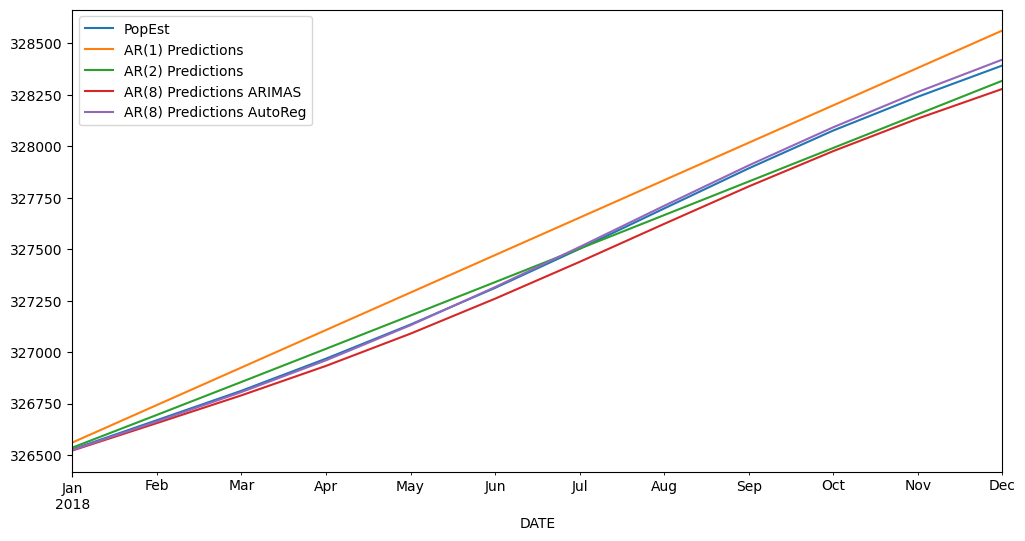

In [70]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions_arima.plot(legend=True,figsize=(12,6))
predictions_ARfit_bic.plot(legend=True, figsize=(12,6))

## Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).

In [72]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','ARIMAS','AutoReg']
preds = [predictions1, predictions2, predictions_arima, predictions_ARfit_bic] 

for i in range(4):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 2713.258668
ARIMAS Error: 4846.793087
AutoReg Error: 186.9721865


In [74]:
modls = [AR1fit,AR2fit,ARIMAfit_bic, ARfit_bic]

for i in range(4):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 767.64
AR(2) AIC: 649.21
ARIMAS AIC: 568.97
AutoReg AIC: 488.35


Como podemos observar, el modelo que mejor se ajusta es el Auregresivo de orden 8, ya que para el valor $$ AIC = -2log(\hat{L}+2k) $$ es el menor valor que obtenemos.

## Predicciones

<Axes: xlabel='DATE'>

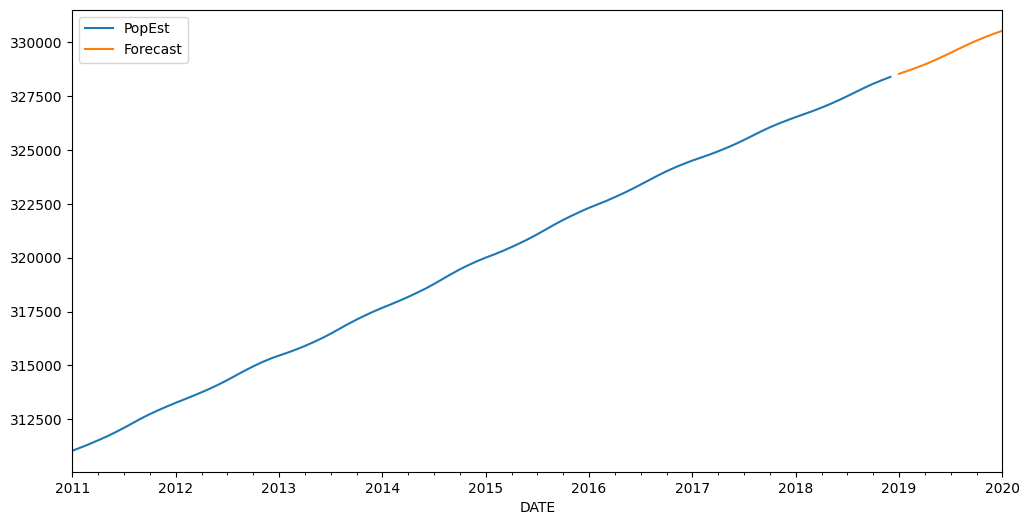

In [ ]:
# First, retrain the model on the full dataset
model = AutoReg(df['PopEst'], lags=8, old_names=False)
# Next, fit the model
ARfit = model.fit()
# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')
# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6))